In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os, sys
import jp_mpl as jplot

In [4]:
indir = '/home/jpyanez/projects/rpp-dgrant/hignight/atmo_flux'
numu = pickle.load(open(os.path.join(indir, 'Level5p_IC86.2013_genie_numu.14600.rlogL.pckl')))

In [5]:
numu.keys()

['ma_qe',
 'mn_stopped_contained',
 'weight',
 'weight_noflux',
 'AhtBY',
 'ptype',
 'weight_e',
 'GENIE_Ws',
 'ma_res',
 'rLogL',
 'CV2uBY',
 'MaNCEL',
 'zenith',
 'rLogL_good',
 'CV1uBY',
 'GENIE_xs',
 'reco_energy',
 'energy',
 'MaNCRES',
 'delta_llh',
 'GENIE_Q2s',
 'GENIE_x',
 'GENIE_y',
 'reco_azimuth',
 'MaCOHpi',
 'interaction',
 'GENIE_Q2',
 'weight_mu',
 'GENIE_W',
 'GENIE_ys',
 'BhtBY',
 'reco_zenith']

In [18]:
dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)

In [21]:
dis.sum()*1./len(dis)

0.7774110490416033

In [31]:
x = np.linspace(0, 3., 21)

b, _ = np.histogram(np.log10(numu['reco_energy'][dis]), x, weights=numu['weight_mu'][dis])
bres, _ = np.histogram(np.log10(numu['reco_energy'][~dis]), x, weights=numu['weight_mu'][~dis])

/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/scipy-stack/2018b/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


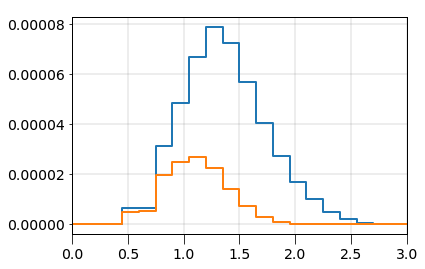

In [32]:
jplot.unfilledBar(x,b, color='C0')
jplot.unfilledBar(x,bres, color='C1')


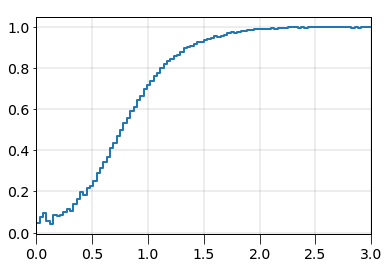

In [28]:
plt.figure()
jplot.unfilledBar(x,b*1./(b+bres), color='C0')


In [43]:
x = np.linspace(-3, 2.5, 101)

b, _ = np.histogram(np.log10(numu['delta_llh'][dis]), x, weights=numu['weight_mu'][dis])
bres, _ = np.histogram(np.log10(numu['delta_llh'][~dis]), x, weights=numu['weight_mu'][~dis])


/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/scipy-stack/2018b/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/scipy-stack/2018b/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


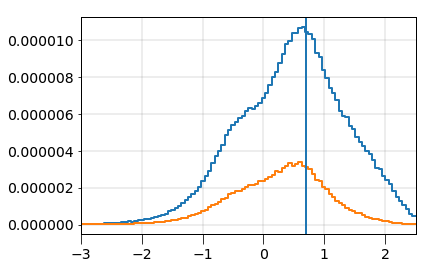

In [44]:
jplot.unfilledBar(x,b, color='C0')
jplot.unfilledBar(x,bres, color='C1')
plt.axvline(np.log(2.), 0, 1)